In [1]:
import sounddevice as sd
import numpy as np #NumPyは基本必須です。インポートしてください。
import wave #オーディオファイルを扱いたい場合インポートし|ます
%matplotlib inline
fs = 192000
sd.default.samplerate = fs
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 Babyface Pro (72991368), Core Audio (14 in, 14 out)
  3 Babyface Pro (72994147), Core Audio (14 in, 14 out)
  4 機器セット, Core Audio (28 in, 28 out)

In [2]:
sd.default.device = 4

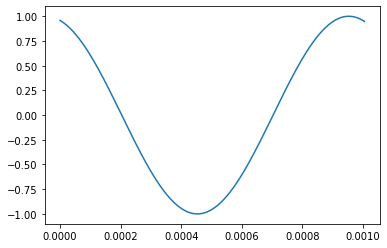

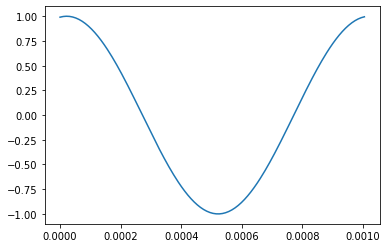

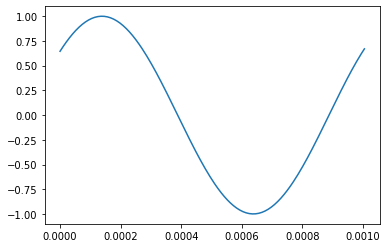

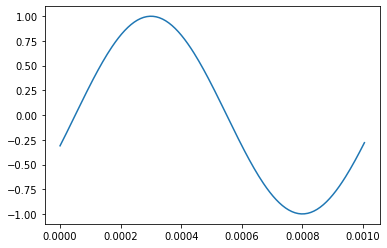

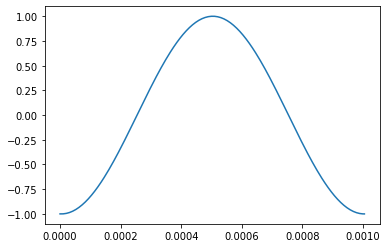

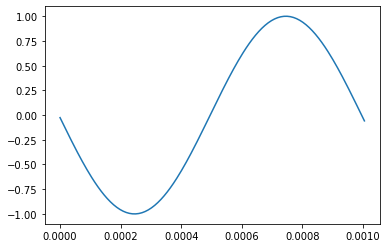

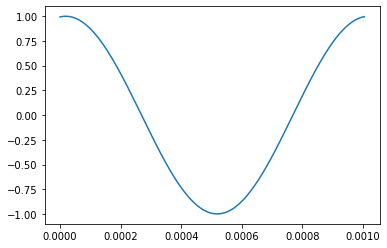

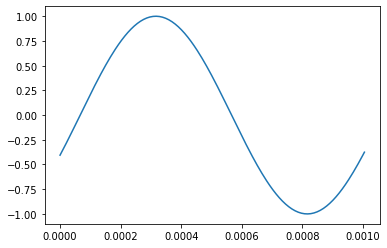

In [4]:
import random
import math
import matplotlib.pyplot as plt
import scipy.io as sio
pi = np.pi
f1 = 1000
f2 = 40000
sin_list = []
filename ='/Users/shota/Documents/klo_lab/matlab/phase/20201020/now'+'15'+'.mat'
phase_0 = sio.loadmat(filename)
phase = phase_0['phix']
A_ = (np.ones(8))
for i in range(8):
    sin1 = A_[i]*np.sin(2*pi*f1*np.arange(0,fs)/fs-phase[i])
    sin2 = A_[i]*np.sin(2*pi*f2*np.arange(0,fs)/fs-phase[i])
    fig = plt.figure(i)
    ax = fig.add_subplot(111)
    ax.plot(np.arange(0,int(fs/f1)+2)/fs,sin1[0:int(fs/f1)+2])
    plt.show()
    
    sin_list.append(sin2)
    

In [5]:
#アンプfullで20Vppになるように調整
sig_list = np.zeros((fs,28))
sig_list[:,0] = sin_list[0]*0.76
sig_list[:,1] = sin_list[1]*0.82
sig_list[:,2] = sin_list[2]*2.40
sig_list[:,3] = sin_list[3]*2.60
sig_list[:,14] = sin_list[4]*0.78
sig_list[:,15] = sin_list[5]*0.88
sig_list[:,16] = sin_list[6]*2.15
sig_list[:,17] = sin_list[7]*2.12

In [6]:
#全部15Vppぐらいになるように調整
sd.play(sig_list*4,fs,loop=True) 

In [7]:
sd.stop()

In [14]:
phase[6]

array([-0.25813673])